# 1 Relay Control

## Simple Relay Control

The following code implements relay control for temperature T1 on the Temperature Control Lab.

\begin{align}
Q(t) & = \begin{cases} 
    Q^{max} &\text{if $T \leq T_{setpoint}$}\\
    0       & \text{if $T \geq T_{setpoint}$}
    \end{cases}
\end{align}

This is simple to implement, in fact it is just one line of code in the following cell. Adjust `Tsetpoint` to a desired setpoint value, then run the cell.

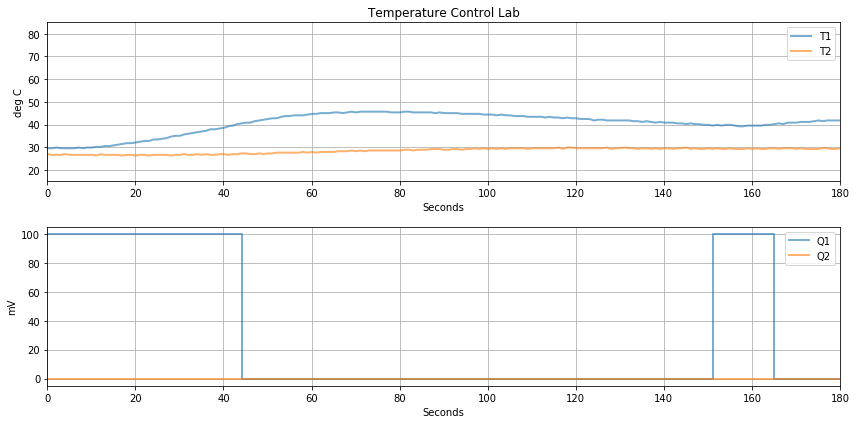

<bound method TCLab.stop of <TCLab.TCLab object at 0x12318e358>>

In [4]:
import sys
sys.path.append("../TCLab")
from TCLab import TCLab, clock

# control parameters
Qmax = 100
Tsetpoint = 40

# time horizon and time step
tfinal = 180
tstep = 1

# perform experiment
a = TCLab()
a.initplot(tfinal)
a.start()
for t in clock(tfinal, tstep):
    a.Q1 = Qmax if a.T1 < Tsetpoint else 0
    a.updateplot()

# finish up
a.stop

In [6]:
a.plot()

## Relay Control with Hysteresis

One of the issues with simple relay control is the potential for 'chattering', which are situations where the manipulated variable (in this case heater power) rapid on-and-off switching. This can be caused by systems that are highly response to control inputs or where the sensor measurements carry significant noise.

The typical home thermostat used for furnace control incorporates a simple but highly effective solution to the chattering period. The idea is to intentially overshoot the setpoint. Then, after the control switches state, there will be at least a short period of time where no further control action should be necessary. The control algorithm can be written

\begin{align}
Q(t) & = \begin{cases} 
    Q^{max} &\text{if $T \leq T_{Setpoint} + \frac{h}{2}$}\\
    0       & \text{if $T \geq T_{Setpoint} - \frac{h}{2}$}
    \end{cases}
\end{align}

where $h$ is the *tolerance* or *hysteresis*. For home heating systems a typical value is 0.5 to 1 degree F. This image shows how hystersis was adjusted on a typical home thermostat in common usage in the late 20th century.

<img src="../images/515px-Honeywell_thermostat_open.jpg" style="width: 300px;"></img>

Image by <a href="//commons.wikimedia.org/wiki/User:Vdegroot" title="User:Vdegroot">Vincent de Groot</a> - <a rel="nofollow" class="external free" href="http://www.videgro.net">http://www.videgro.net</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by/2.5" title="Creative Commons Attribution 2.5">CC BY 2.5</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=902832">Link</a>

The furnance is turned on for temperatures below the range 

\begin{align}
T_{Setpoint} - \frac{h}{2} \leq T \leq T_{Setpoint} + \frac{h}{2}
\end{align}

and is turned for temperatures above the range. Within the range, however, the furnance may be on or off, depending on what happened at the last decision point.

The following code implements relay control with hystersis. 

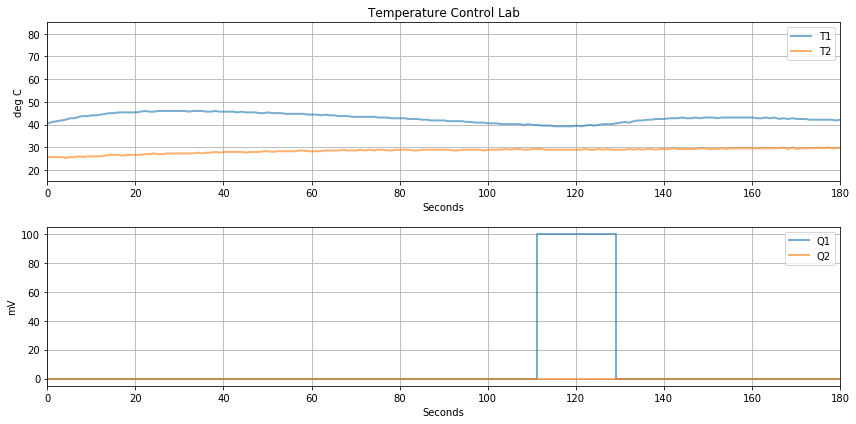

<bound method TCLab.stop of <TCLab.TCLab object at 0x120c85160>>

In [2]:
import sys
sys.path.append("../TCLab")
from TCLab import TCLab, clock

# control parameters
Qmax = 100
Tsetpoint = 40
h = 0.5

# time horizon and time step
tfinal = 180
tstep = 1

# perform experiment
a = TCLab()
a.initplot(tfinal)
a.start()
for t in clock(tfinal, tstep):
    a.Q1 = 100 if (a.T1 <= Tsetpoint - h/2) else a.Q1
    a.Q1 = 0 if (a.T1 >= Tsetpoint + h/2) else a.Q1
    a.updateplot()

# finish up
a.stop

## Exercises

1. Examining the closed-loop responses, it's obvious that the heater is oversized for the purpose of control at 40 deg C.  Try other values for $Q^{\max}$ to see if you can improve closed-loop performance.

2. What is the effect of sample time on control performance? What happens if you make the controller sample time longer?

3. In a new cell, create a modification of the script to include a change in setpoint from 40 deg C to 50 deg C at the 300 second mark. Run the experiment for at least 10 minutes to see the full effect.